In [54]:
import pandas as pd
import numpy as np

path = r"T:\002_Papers\07_RainfallSimulator2\Data2021"
fileA = r"RunoffSoilloss.csv"
fileB = r"TextureSoilLoss.csv"

Runoff = pd.read_csv(path+"\\"+fileA,header=0, skiprows=1, delimiter=";", encoding="utf-8")
Texture = pd.read_csv(path+"\\"+fileB,header=0, skiprows=1, delimiter=";", encoding="utf-8")

Runoff["Time (relative)"] = pd.to_datetime(Runoff["Time (relative)"], errors="coerce", format="%H:%M:%S").dt.time
Runoff["Time (numeric)"] = Runoff["Time (relative)"].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)/60

Texture["Time (relative)"] = pd.to_datetime(Texture["Time (relative)"], errors="coerce", format="%H:%M:%S").dt.time
Texture["Time (numeric)"] = Texture["Time (relative)"].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)/60
Texture

,Time (relative),Sand,Silt,Clay,Time (numeric)
0,00:00:00,NaN,NaN,NaN,0.0
1,00:02:30,15.0,26.0,59.0,2.5
2,00:05:00,NaN,NaN,NaN,5.0
3,00:07:30,NaN,NaN,NaN,7.5
4,00:10:00,NaN,NaN,NaN,10.0
5,00:12:30,NaN,NaN,NaN,12.5
6,00:15:00,20.0,70.0,10.0,15.0
7,00:17:30,NaN,NaN,NaN,17.5
8,00:20:00,NaN,NaN,NaN,20.0
9,00:22:30,NaN,NaN,NaN,22.5


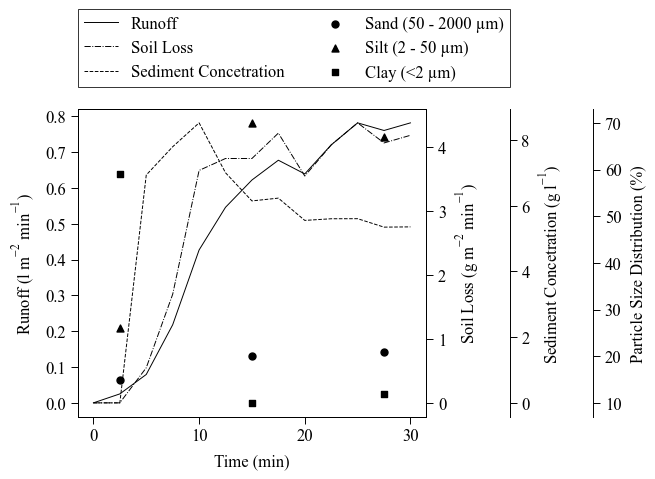

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data handling


# Constants for font and line sizes
fSIZE = 12
LINEo = 1
POINTo = 2
LINEw = 0.7
POINTs = 25

# Define colorblind-friendly colors
colorblind_friendly_colors = [
    "black",
    "#444444",  # dark grey
    "#E69F00",  # orange
    "#56B4E9",  # sky blue
    "#009E73",  # bluish-green
    "#F0E442",  # yellow
    "#0072B2",  # blue
    "#D55E00",  # vermillion
    "#CC79A7",  # reddish-purple
    "#999933",  # olive green
    "#882255",  # wine
]

CustomColor = colorblind_friendly_colors

plt.rcParams.update({'font.family':'Times New Roman'})

plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['mathtext.sf'] = 'Times New Roman'

# Plotting
fig, ax1 = plt.subplots(figsize=(4.5, 4))
# ax1.set_xlim(0, 6)
# ax1.set_ylim(0, 1.1)

# Runoff
line1, = ax1.plot(Runoff["Time (numeric)"], Runoff["Runoff"], c=CustomColor[0], zorder=LINEo, lw=LINEw, ls="solid",
                  label="Runoff")
ax1.set_ylabel("Runoff (l m$^{-2}$ min$^{-1}$)", fontsize=fSIZE, labelpad=6)
ax1.set_xlabel("Time (min)", fontsize=fSIZE, labelpad=6)
ax1.tick_params(axis="both", length=5, width=0.7, which="major", labelsize=fSIZE)
ax1.spines["top"].set_linewidth(0.7)
ax1.spines["bottom"].set_linewidth(0.7)
ax1.spines["left"].set_linewidth(0.7)
ax1.spines["right"].set_linewidth(0.7)

# Soil Loss
ax2 = ax1.twinx()
line2, = ax2.plot(Runoff["Time (numeric)"], Runoff["SoilLoss"], c=CustomColor[0], zorder=LINEo, lw=LINEw, ls="dashdot",
                  label="Soil Loss")
ax2.set_ylabel("Soil Loss (g m$^{-2}$ min$^{-1}$)", fontsize=fSIZE, labelpad=6)
ax2.tick_params(axis="both", length=5, width=0.7, which="major", labelsize=fSIZE)
ax2.spines["top"].set_linewidth(0.7)
ax2.spines["bottom"].set_linewidth(0.7)
ax2.spines["left"].set_linewidth(0.7)
ax2.spines["right"].set_linewidth(0.7)

# Soil Loss - Concentration
ax3 = ax1.twinx()
line3, = ax3.plot(Runoff["Time (numeric)"], Runoff["SoilLossC"], c=CustomColor[0], zorder=LINEo, lw=LINEw, ls="dashed",
                  label="Sediment Concetration")
ax3.spines["right"].set_position(("outward", 60))  # Offset the third y-axis
ax3.set_ylabel("Sediment Concetration (g l$^{-1}$)", fontsize=fSIZE, labelpad=6)
ax3.tick_params(axis="both", length=5, width=0.7, which="major", labelsize=fSIZE)
ax3.spines["top"].set_linewidth(0.7)
ax3.spines["bottom"].set_linewidth(0.7)
ax3.spines["left"].set_linewidth(0.7)
ax3.spines["right"].set_linewidth(0.7)

# Soil Texture - Sand
ax4 = ax1.twinx()
point1 = ax4.scatter(Texture["Time (numeric)"], Texture["Sand"], c=CustomColor[0], zorder=POINTo, s=POINTs, marker="o",
                     label="Sand (50 - 2000 µm)")
ax4.spines["right"].set_position(("outward", 120))  # Offset the fourth y-axis
ax4.set_ylabel("Particle Size Distribution (%)", fontsize=fSIZE, labelpad=6)
ax4.tick_params(axis="both", length=5, width=0.7, which="major", labelsize=fSIZE)
ax4.spines["top"].set_linewidth(0.7)
ax4.spines["bottom"].set_linewidth(0.7)
ax4.spines["left"].set_linewidth(0.7)
ax4.spines["right"].set_linewidth(0.7)

# Soil Texture - Silt
point2 = ax4.scatter(Texture["Time (numeric)"], Texture["Silt"], c=CustomColor[0], zorder=POINTo, s=POINTs, marker="^",
                     label="Silt (2 - 50 µm)")


# Soil Texture - Clay
point3 = ax4.scatter(Texture["Time (numeric)"], Texture["Clay"], c=CustomColor[0], zorder=POINTo, s=POINTs, marker="s",
                     label="Clay (<2 µm)")


# Combine legends
handles = [line1, line2, line3, point1, point2, point3]
labels = [handle.get_label() for handle in handles]
legend = fig.legend(handles, labels, loc='upper center',
                    bbox_to_anchor=(0.606, 1.15), fontsize=fSIZE, ncol=2, frameon=True, fancybox=False, edgecolor="black")
legend.get_frame().set_linewidth(LINEw)